## MyNN Example - Flower data classification
This example is based on an a dataset generation function that was found on online course [Neural Networks by Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning/)


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('..'))

### Flower Dataset
The dataset consist of points in 2D space that represent a flower. Each dot is colored red or blue with the value 1 or 0. The purpose is to model the color of the points.

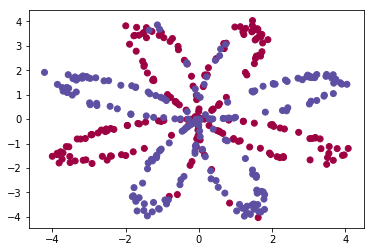

In [2]:
from examples.planar import load_planar_dataset, plot_decision_boundary
    
flower_X, flower_Y = load_planar_dataset()
plt.scatter(flower_X[0, :], flower_X[1, :], c=flower_Y.reshape(-1), cmap=plt.cm.Spectral)
plt.show()

### Create a 3-Layers FNN
We will use 2 hidden layer with `tanh` activation function and one output with `sigmoid` activation function.


In [3]:
from mynn import NNModel
from mynn.activation import TanhActivation, SigmoidActivation
from mynn.layers import FullyConnected, Input
from mynn.optimizers import GradientDescent
from mynn.loss import BinaryCrossEntropyLoss
from mynn.endecoders import ThresholdBinaryEncoderDecoder

# Connect layers
x_input = Input((flower_X.shape[0], None))
x = FullyConnected(7, TanhActivation)(x_input)
x = FullyConnected(5, TanhActivation)(x)
x = FullyConnected(1, SigmoidActivation)(x)

# Declare model and its hyperparameters
model = NNModel(
    inputs=x_input,
    outputs=x,
    optimizer=GradientDescent(learning_rate=1.2),
    loss_function=BinaryCrossEntropyLoss(),
    output_encoder_decoder=ThresholdBinaryEncoderDecoder())


### Train model
To train the model we need to execute `train()` with the input X and output Y values. The samples must be stacked horizontaly so that the same of arrays is `(N, m)` and `(1, m)` where `N` is the number of features and `m` the number of samples.

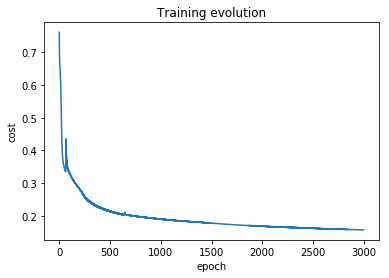

In [4]:
ctx = model.train(flower_X, flower_Y, epochs=3000)
history = ctx.iterations_history_as_dataframe()
plt.plot(history['epoch'], history['loss'])
plt.title('Training evolution')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

### Evaluate accuracy on the training dataset
Although it is not an unbiased and generalized way to check the performance of the model on unseen data, it is a valid method to check that the model has learned the data.

Accuracy: 91.2%


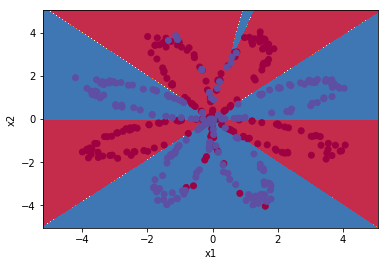

In [5]:
from sklearn.metrics import accuracy_score

pred_Y = model.predict(flower_X)
print("Accuracy: {:.1f}%".format(accuracy_score(flower_Y.squeeze(), pred_Y.squeeze()) * 100.0))
f= plt.figure()
plot_decision_boundary(lambda x: model.predict(x.T), flower_X, flower_Y.reshape(-1), ax=plt.gca())